### Part B
In this part of the assignment, we will build an interactive dashboard system based on the Tavily Data Analysis dataset.
We will present 3 key insights (trends, segment performance, usage patterns, etc.) including analysis by time, breakdown into metrics, changes over time, summary and business recommendations.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [3]:
df = pd.read_csv('Tavily Data Analysis - BI.csv')
df.head()

,API_KEY_ID,BASE_URL,MAX_DEPTH,MAX_BREADTH,EXTRACT_DEPTH,SELECT_PATHS,SELECT_DOMAINS,CATEGORIES,ALLOW_EXTERNAL,STATUS,...,EXTRACT_TIME,RESPONSE_TIME,QUERY,TOTAL_LLM_CALLS,ERROR,ERROR_MESSAGE,INSTRUCTIONS,CREATED,FORMAT,CRAWL_OUTCOME
0,-7.149341e+18,https://www.sma.de/en/sustainability/all-impor...,10,5,basic,[],"[\n ""www.sma.de""\n]",[],False,done,...,4.15,13.56,NaN,2,NaN,NaN,Extract PDF links and see if specific sustaina...,2025-06-08 2:48:01,markdown,NaN
1,-7.149341e+18,https://www.smiths.com/sustainability/sustaina...,10,5,basic,"[\n ""/""\n]","[\n ""smiths.com""\n]",[],False,done,...,2.16,8.63,NaN,2,NaN,NaN,Extract summary supply chain ESG metrics inclu...,2025-06-08 2:48:16,markdown,NaN
2,-7.149341e+18,https://www.sobi.com/en/about-sobi/sustainability,20,10,basic,[],"[\n ""sobi.com""\n]",[],False,done,...,1.10,7.07,NaN,2,NaN,NaN,Extract any mention of suppliers or supply cha...,2025-06-08 2:49:58,markdown,NaN
3,-7.149341e+18,https://www.sobi.com/en/responsible-sourcing,20,10,basic,[],"[\n ""sobi.com""\n]",[],False,failed,...,0.69,11.04,NaN,2,NaN,NaN,"Extract any mention of supplier numbers, SBTi ...",2025-06-08 2:50:41,markdown,NaN
4,-7.149341e+18,https://www.sma.de/en/sustainability/shaping-a...,10,5,basic,[],"[\n ""www.sma.de""\n]",[],False,done,...,1.77,17.15,NaN,3,NaN,NaN,Extract supplier metrics data if available,2025-06-08 2:50:43,markdown,NaN


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60399 entries, 0 to 60398
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   API_KEY_ID         60399 non-null  float64
 1   BASE_URL           60399 non-null  object 
 2   MAX_DEPTH          60399 non-null  int64  
 3   MAX_BREADTH        60399 non-null  int64  
 4   EXTRACT_DEPTH      60139 non-null  object 
 5   SELECT_PATHS       17591 non-null  object 
 6   SELECT_DOMAINS     13111 non-null  object 
 7   CATEGORIES         8382 non-null   object 
 8   ALLOW_EXTERNAL     60399 non-null  bool   
 9   STATUS             60399 non-null  object 
 10  PAGES_CRAWLED      10932 non-null  float64
 11  MAX_DEPTH_REACHED  60399 non-null  int64  
 12  SUCCESSFUL_URLS    60399 non-null  int64  
 13  TOTAL_CREDITS      60399 non-null  int64  
 14  MAPPING_TIME       48138 non-null  float64
 15  EXTRACT_TIME       48138 non-null  float64
 16  RESPONSE_TIME      603

### mini eda for data

deal with missig valuse

In [5]:
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

EXTRACT_DEPTH       260
SELECT_PATHS      42808
SELECT_DOMAINS    47288
CATEGORIES        52017
PAGES_CRAWLED     49467
MAPPING_TIME      12261
EXTRACT_TIME      12261
RESPONSE_TIME        26
QUERY             58084
ERROR             49469
ERROR_MESSAGE     60389
INSTRUCTIONS      37645
FORMAT            24273
CRAWL_OUTCOME     48152
dtype: int64


In [6]:
#deal with critical culumns
critical_columns = ['RESPONSE_TIME','PAGES_CRAWLED']
df = df.dropna(subset=critical_columns)

#columns that have selected values
for col in ['SELECT_PATHS','SELECT_DOMAINS','CATEGORIES','ERROR_MESSAGE','QUERY','INSTRUCTIONS']:
    if col in df:
        df[col] = df[col].fillna('')


In [7]:
#fill boolean error
if 'error' in df:
    df['error'] = df['error'].fillna(False)

In [13]:
for col in ['MAPPING_TIME','EXTRACT_TIME']:
    if col in df:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

df['EXTRACT_DEPTH'] = df['EXTRACT_DEPTH'].fillna('basic')
df['FORMAT'] = df['FORMAT'].fillna('unknown')

df['CRAWL_OUTCOME'] = df['CRAWL_OUTCOME'].fillna('unknown')




In [14]:
print(df.isna().sum())

API_KEY_ID           0
BASE_URL             0
MAX_DEPTH            0
MAX_BREADTH          0
EXTRACT_DEPTH        0
SELECT_PATHS         0
SELECT_DOMAINS       0
CATEGORIES           0
ALLOW_EXTERNAL       0
STATUS               0
PAGES_CRAWLED        0
MAX_DEPTH_REACHED    0
SUCCESSFUL_URLS      0
TOTAL_CREDITS        0
MAPPING_TIME         0
EXTRACT_TIME         0
RESPONSE_TIME        0
QUERY                0
TOTAL_LLM_CALLS      0
ERROR                0
ERROR_MESSAGE        0
INSTRUCTIONS         0
CREATED              0
FORMAT               0
CRAWL_OUTCOME        0
dtype: int64


In [17]:
df['CREATED'] = pd.to_datetime(df['CREATED'], errors='coerce')
df = df.set_index('CREATED')

## KPIs
In this section, we will focus on four key KPIs.

## Total Crawls


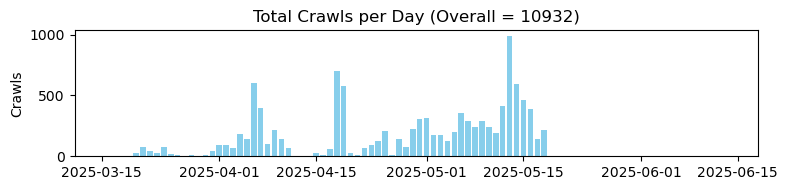

In [18]:
# Total Crawls per Day
daily_crawls = df.resample('D').size()
total_crawls = daily_crawls.sum()

plt.figure(figsize=(8,2))
plt.bar(daily_crawls.index, daily_crawls.values, color='skyblue')
plt.title(f"Total Crawls per Day (Overall = {total_crawls})")
plt.ylabel('Crawls')
plt.tight_layout()
plt.show()

Naturally, this is the most basic measure of the amount of service usage: how many times the crawler was run. 

**What the measure shows:**
 General activity and usage trend; an increase or decrease in usage suggests infrastructure load and potential for capacity issues.

## Average Response Time

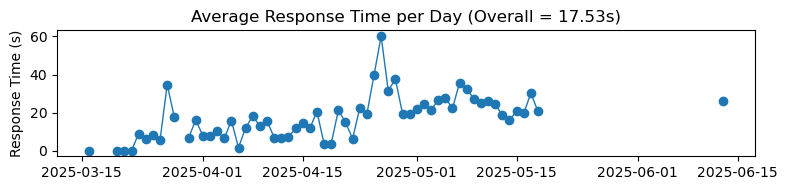

In [19]:
#Average Response Time per Day
daily_avg_resp = df['RESPONSE_TIME'].resample('D').mean()

plt.figure(figsize=(8,2))
plt.plot(daily_avg_resp.index, daily_avg_resp.values, marker='o', linewidth=1)
plt.title(f"Average Response Time per Day (Overall = {df['RESPONSE_TIME'].mean():.2f}s)")
plt.ylabel('Response Time (s)')
plt.tight_layout()
plt.show()

A critical performance measure for the system. in a competitive market, a long response time may harm the user experience.

**What the measure shows:** System stability and availability. A slight increase immediately indicates a load or a fault that we need to investigate.

## Active API Keys

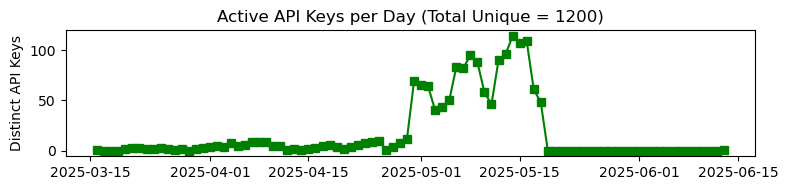

In [20]:
daily_active_keys = df.groupby(pd.Grouper(freq='D'))['API_KEY_ID'].nunique()
total_active_keys = df['API_KEY_ID'].nunique()

plt.figure(figsize=(8,2))
plt.plot(daily_active_keys.index, daily_active_keys.values, marker='s', color='green')
plt.title(f"Active API Keys per Day (Total Unique = {total_active_keys})")
plt.ylabel('Distinct API Keys')
plt.tight_layout()
plt.show()

The size of the user audience is an indicator of future load and capacity planning. Also reflects product adoption.

**What the measure shows:** Distribution of usage among different customers – is there a broad audience or is it locked to only a few “those who need it”.

## Error Rate

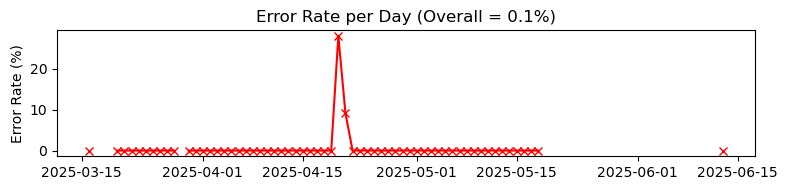

In [21]:
daily_error_rate = df['ERROR'].resample('D').mean() * 100

plt.figure(figsize=(8,2))
plt.plot(daily_error_rate.index, daily_error_rate.values, marker='x', color='red')
plt.title(f"Error Rate per Day (Overall = {df['ERROR'].mean()*100:.1f}%)")
plt.ylabel('Error Rate (%)')
plt.tight_layout()
plt.show()

System stability and reliability – how many times did an error occur in the process?

**What the metric shows:** Possible vulnerabilities – if the rate is high at a certain time or in a certain segment, it should be investigated.

## Feature Enginnering

In [22]:
df['DAY']   = df.index.date 
df['WEEK']  = df.index.isocalendar().week 
df['MONTH'] = df.index.month 

**day** allows me to analyze daily trends and attach a daily graph.

**week** allows me to identify weekly usage patterns (e.g. peaks at the beginning of the week).

**month** represents monthly trends (e.g. end of month load).

## Groups by time dimension + segment

<Figure size 1000x400 with 0 Axes>

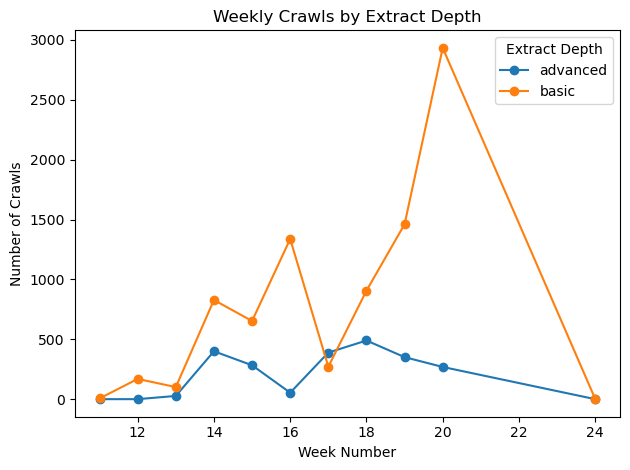

In [24]:
weekly_by_depth = (
    df
    .groupby(['WEEK','EXTRACT_DEPTH'])
    .size()
    .unstack(fill_value=0)
)
plt.figure(figsize=(10, 4))
weekly_by_depth.plot(kind='line', marker='o')
plt.title('Weekly Crawls by Extract Depth')
plt.xlabel('Week Number')
plt.ylabel('Number of Crawls')
plt.legend(title='Extract Depth')
plt.tight_layout()
plt.show()

**weekly_by_depth** 
This graph shows the number of crawls for each week by EXTRACT_DEPTH mode (basic vs. advanced), to compare segmental trends.

1. **Uptrend in basic reads in the later weeks:**
The number of basic crawls increased significantly from week 13 to a peak in week 20 (~2,900 reads). This indicates a general increase in demand for basic use of the system, possibly due to marketing reinforcement or something else.

2. **Seasonality or “events” for advanced**
While basic shows a continuous increase, advanced remains relatively low and fragmented: in weeks 14 and 18 there are peaks of ~400–500 advanced crawls, but then it drops back to only 200–300. This indicates that individual users (or specific campaigns) are triggering advanced on a specific date or event, and not on a regular basis.

<Figure size 1000x400 with 0 Axes>

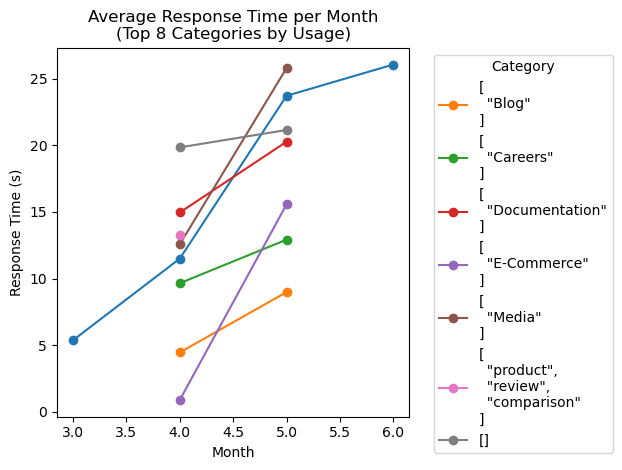

In [29]:
top_cats = df['CATEGORIES'].value_counts().nlargest(8).index
monthly_top = (
    df[df['CATEGORIES'].isin(top_cats)]
    .groupby(['MONTH','CATEGORIES'])['RESPONSE_TIME']
    .mean()
    .unstack()
)
plt.figure(figsize=(10,4))
monthly_top.plot(marker='o')
plt.title('Average Response Time per Month\n(Top 8 Categories by Usage)')
plt.xlabel('Month')
plt.ylabel('Response Time (s)')
plt.legend(title='Category', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

**Average Response Time per Month\n(Top 8 Categories by Usage)**
This graph shows the average response time each month, separated by program category, to find out which categories produce higher response times and when.

1. **Consistent increase in response times over the months**
For all categories examined, there is a clear trend of average increase: Month 3 starts in the 5–20 second range, and Month 6 reaches the 9–27 second range. This indicates an increasing load or lack of resources as usage increases.

2. **Particularly steep jump in E-Commerce and Documentation**
“E-Commerce” starts at less than 1 s in Month 4 and jumps to 15.5 s in Month 5 — a jump of over 1500%.
“Documentation” increases from 15 s in Month 4 to about 20 s in Month 5 — a significant jump that requires investigation (perhaps changes in the crawler or page structure).

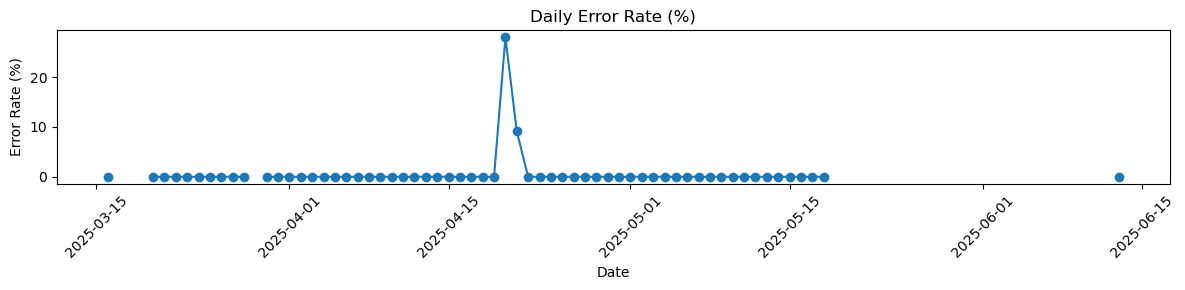

In [35]:
daily_err = df['ERROR'].resample('D').mean() * 100

plt.figure(figsize=(12,3))
plt.plot(daily_err.index, daily_err.values, marker='o', linestyle='-')
plt.title('Daily Error Rate (%)')
plt.xlabel('Date')
plt.ylabel('Error Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Daily Error Rate (%): Identifying waves of failures over the course of days**

1. **An unusual event in mid-April**
Around April 20–21, there was a sharp outbreak of errors: the error rate climbed to about +28% that day. This indicates a significant system malfunction or a change in the client/server configuration that required immediate investigation.

2. **Most of the period is almost completely zero**
Except for that spike in mid-April and a few isolated points (such as the appearance of a slight error in mid-March and mid-June), the error rate remained close to 0%. This indicates good overall stability of the system most of the time.

# Key insights to summarize

**Insight 1: Dramatic increase in basic usage load alongside moderate volatility in Advanced** 

From the weekly graph of the number of reads by EXTRACT_DEPTH, we saw that between week 13 and week 20 there was a significant increase in basic usage (from 100–800 reads per week to almost 3,000), while advanced reads remained relatively low, with only occasional peaks (~500 in week 18) and a return to a level of 200–300.


**Significance and effect:**

- **Infrastructure load:** We need to prepare in terms of capacity on the basic servers, as the demand for continuous growth.
- **Focus on Advanced development:** Since the use of advanced is not growing at a rapid pace, the pleasant experience in basic may not translate into customers abandoning advanced actions — incentives, documentation, or UX upgrades for advanced users should be considered.

**Insight 2: General increase and identification of problematic categories in response performance**

A lineplot of the average response time by category (Top 8) revealed that all of them suffered a sharp increase in April-May, but some categories are characterized by more extreme performance.

- “E-Commerce” was characterized by an extreme jump from <1 second in month 4 to 15.5 seconds in month 5, a clear anomaly that requires testing changes in design or launched features.

- Stable categories such as “Blog” maintained relatively low response times (5–9 seconds), which indicates that the crawler is able to handle simple pages at high speed

**Significance and effect:**

- **Responsive monitor:** Launch automatic warnings when these categories cross a critical operational threshold (e.g. 20 seconds).

**Insight 3: Peak times of isolated failures that overshadow system stability**

From the daily error rate graph, we found two critical points:

- A major event on April 20–21 with errors of over 25%, which led to about 1/4 of the calls failing—a severe situation.

- Smaller error events in mid-May and late June (1–2%), which indicate point failures (e.g. code updates, sudden load).

During the rest of the period, the error rate remained almost zero.

**Significance and impact:**

- **Event-driven monitoring:** A possible solution is to set up a predictive alert system that automatically raises a flag when the error rate exceeds a threshold (e.g. 5%) for a short period of time, to reduce downtime.

- **Root cause investigation:** It may be necessary to examine logs and event times around the abnormal dates to find the causes (configuration changes, unexpected load, network issues) and prevent recurrence.

## Summary and recommendations for action

- **Scaling & Caching for Basic:** Strengthen infrastructure and caching performance for Basic mode to support dramatic increases in usage.

- **Alerting & Incident Management:** Establish dynamic error rate monitoring and perform root cause investigation of any abnormal event to improve operational stability and reliability.